In [1]:
import numpy as np
import json
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN
import time

### Load Tweeter Data

In [48]:
with open('tweets/tweets_1M.json') as data_file:    
    data = json.load(data_file)

In [3]:
X = []
for i in data:
    X.append([i['lng'],i['lat']])
X = np.array(X)

## Q3.1

In [4]:
k = 100
N = [1e2,1e3, 2e3, 4e3, 6e3, 8e3,  1e4, 2e4, 4e4, 6e4, 8e4, 1e5]

In [57]:
for n in N:
    n = int(n)  
    t0 = time.time()
    exp = KMeans(n_clusters=k, max_iter=10000).fit(X[:n])   
    t_clustering = time.time() - t0
    print('for N = %d, the time is %f' %(n ,t_clustering))

c:\users\seebarsh\miniconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (97) found smaller than n_clusters (100). Possibly due to duplicate points in X.
  return_n_iter=True)


for N = 100, the time is 0.581193
for N = 1000, the time is 0.860646
for N = 2000, the time is 1.315524
for N = 4000, the time is 2.213522
for N = 6000, the time is 3.114023
for N = 8000, the time is 3.938611
for N = 10000, the time is 4.557726
for N = 20000, the time is 9.325501
for N = 40000, the time is 23.910697
for N = 60000, the time is 36.371281
for N = 80000, the time is 51.893390
for N = 100000, the time is 131.994945


In [60]:
n = 100000
K = [10,50,100,200,500,1000]

In [62]:
for k in K:
    
    t0 = time.time()
    exp = KMeans(n_clusters=k, max_iter=10000).fit(X[:100000])   
    t_clustering = time.time() - t0
    print('for k = %d, the time is %fs' %(k ,t_clustering))

for k = 10, the time is 2.309763s
for k = 50, the time is 16.416492s
for k = 100, the time is 41.684083s
for k = 200, the time is 93.095096s
for k = 500, the time is 226.878303s
for k = 1000, the time is 449.588510s


## Q3.2

In [63]:
k = 100
N = [1e2,1e3, 2e3, 4e3, 6e3, 8e3,  1e4, 2e4, 4e4, 6e4, 8e4, 1e5]

for n in N:
    n = int(n)  
    t0 = time.time()
    exp = MiniBatchKMeans(n_clusters=k, max_iter=10000).fit(X[:n])   
    t_clustering = time.time() - t0
    print('for N = %d, the time is %f' %(n ,t_clustering))

for N = 100, the time is 0.122357
for N = 1000, the time is 0.094840
for N = 2000, the time is 0.098736
for N = 4000, the time is 0.119681
for N = 6000, the time is 0.251328
for N = 8000, the time is 0.123670
for N = 10000, the time is 0.352809
for N = 20000, the time is 0.159576
for N = 40000, the time is 0.224399
for N = 60000, the time is 0.292260
for N = 80000, the time is 0.348027
for N = 100000, the time is 0.447805


In [64]:
n = 100000
K = [10,50,100,200,500,1000]

for k in K:
    
    t0 = time.time()
    exp = KMeans(n_clusters=k, max_iter=10000).fit(X[:100000])   
    t_clustering = time.time() - t0
    print('for k = %d, the time is %fs' %(k ,t_clustering))

for k = 10, the time is 2.828393s
for k = 50, the time is 16.882158s
for k = 100, the time is 42.547453s
for k = 200, the time is 88.619178s
for k = 500, the time is 229.841930s
for k = 1000, the time is 313.360983s


## Q3.3

In [85]:
#eps: The maximum distance between two samples for them to be considered as in the same neighborhood

N = 100000
miles = np.arange(0.01,2.01,0.05)
kilometers = miles / 0.621371
EPS = kilometers / 100

In [86]:
for eps in EPS:
    t0 = time.time()
    exp = DBSCAN(eps=eps, min_samples=100).fit(X[:N])
    t_clustering = time.time() - t0
    print('for eps = %f, get %d clusters, the time is %fs' %(eps ,len(np.unique(exp.labels_)), t_clustering))

for eps = 0.000161, get 32 clusters, the time is 0.652733s
for eps = 0.000966, get 59 clusters, the time is 0.734245s
for eps = 0.001770, get 86 clusters, the time is 0.815868s
for eps = 0.002575, get 96 clusters, the time is 0.911613s
for eps = 0.003380, get 116 clusters, the time is 1.014884s
for eps = 0.004184, get 135 clusters, the time is 1.131398s
for eps = 0.004989, get 144 clusters, the time is 1.233594s
for eps = 0.005794, get 151 clusters, the time is 1.421827s
for eps = 0.006598, get 160 clusters, the time is 1.463858s
for eps = 0.007403, get 148 clusters, the time is 1.568487s
for eps = 0.008208, get 134 clusters, the time is 1.706298s
for eps = 0.009012, get 114 clusters, the time is 1.814578s
for eps = 0.009817, get 107 clusters, the time is 1.999963s
for eps = 0.010622, get 96 clusters, the time is 2.197895s
for eps = 0.011426, get 82 clusters, the time is 2.226279s
for eps = 0.012231, get 75 clusters, the time is 2.444034s
for eps = 0.013036, get 68 clusters, the time i

## Q3.4

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [12]:
Y = []
for i in data:
    Y.append([i['text']])
Y = np.array(Y)

In [59]:
Z = []
for i in data:
    Z.append([i['user_id']])
Z = np.array(Z)

In [5]:
#convert 100 to a degree (just approximation)
#A latitude/ longitude in degrees will be converted to km by multiplying it with ~111.111 kms.

meters = 100
eps = meters / 100000

In [43]:
t0 = time.time() 
exp = MiniBatchKMeans(n_clusters=100, init='k-means++',batch_size=1000).fit(X)
d = {'lng': X[:,0], 'lat': X[:,1], 'cluster_Mini': exp.labels_}
df = pd.DataFrame(data=d)

for i in range(100):
    subset = df.loc[df['cluster_Mini'] == i]
    length = len(subset.lng.values)
    data = np.concatenate((subset.lng.values.reshape(length,1), subset.lat.values.reshape(length,1)), axis = 1)
    res = DBSCAN(eps=eps, min_samples=100).fit(data)
    subset['cluster_DB'] = res.labels_
    df.loc[df['cluster_Mini'] == i, 'cluster_DB'] = subset['cluster_DB']
    
t_clustering = time.time() - t0
print('generate %d unique clusters using %f seconds: '% \
      (len(df.groupby(['cluster_Mini','cluster_DB']).size().reset_index().rename(columns={0:'count'})),t_clustering))


generate 1707 unique clusters using 19.739174 seconds: 


## Q3.5 (Bonus +5)

In [44]:
#inspired by https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
df1 = df.copy()
df1['labels'] = df1['cluster_Mini'] + df1['cluster_DB'].replace(-1, np.nan)/100.

In [45]:
df1['text'] = Y

In [60]:
df1['user_id'] = Z

In [15]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
a = np.unique(df1['labels'].dropna())
unique_labels = np.append(np.unique(df1['labels'].dropna()),np.nan)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

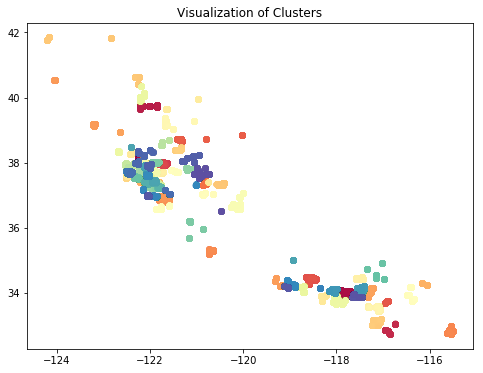

In [17]:
plt.figure(figsize = (8,6))
i =0
for k, col in zip(unique_labels, colors):
    if k == np.nan:
        # Black used for noise.
        col = [0, 0, 0, 1]

    #class_member_mask = (labels == k)
    df2 = df1.loc[df1['labels'] == k]
    #xy = X[class_member_mask & core_samples_mask]
    plt.plot(df2['lng'], df2['lat'], 'o', color=tuple(col), markersize=5)

    #xy = X[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             #markeredgecolor='k', markersize=6)
plt.title('Visualization of Clusters')
plt.show()

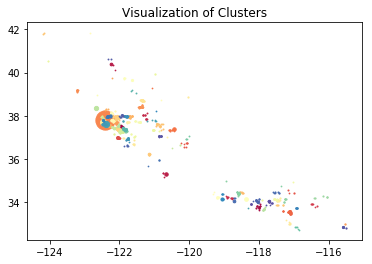

In [46]:
for k, col in zip(unique_labels, colors):
    if k == np.nan:
        # Black used for noise.
        col = [0, 0, 0, 1]

    #class_member_mask = (labels == k)
    df2 = df1.loc[df1['labels'] == k]
    area = (len(df2)/200)
    plt.scatter(np.average(df2['lng']), np.average(df2['lat']), s = area, color=tuple(col))

plt.title('Visualization of Clusters')
plt.show()

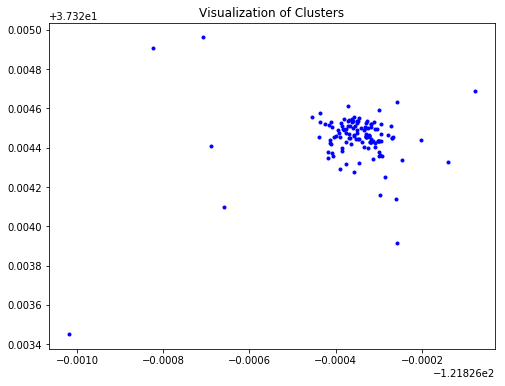

In [70]:
plt.figure(figsize = (8,6))
k = np.random.choice(unique_labels)
df2 = df1.loc[df1['labels'] == k]
plt.plot(df2['lng'], df2['lat'], 'o', color='b', markersize=3)
plt.title('Visualization of Clusters')
plt.show()

In [71]:
df2

,lng,lat,cluster_Mini,cluster_DB,labels,text,user_id
99,-121.826334,37.324488,71,1.0,71.01,@kryzllicious I'm sooo gonna fail on that test...,594060435
13746,-121.826406,37.324360,71,1.0,71.01,I just want to stay in bed. 😩😩,594060435
31144,-121.826410,37.324417,71,1.0,71.01,I think I should get a haircut. 💇,594060435
31740,-121.826372,37.324535,71,1.0,71.01,What the fuuuuuck. 😂😭 @k00ladam #notcute http:...,594060435
31831,-121.826320,37.324431,71,1.0,71.01,@k00ladam #sonotcayute,594060435
33483,-121.826280,37.324466,71,1.0,71.01,@To_infinity04 You need to start reading those...,594060435
33915,-121.826358,37.324555,71,1.0,71.01,"Believe me sweetie, I got enough to feed the n...",594060435
39674,-121.826246,37.324338,71,1.0,71.01,Ignorant ass people on ask.fm right now. 😒😒 #l...,594060435
42267,-121.826077,37.324687,71,1.0,71.01,Ugh. I give up on homework. 😒😒 #fuckdat,594060435
42413,-121.826329,37.324456,71,1.0,71.01,Who's going to the game tomorrow?,594060435


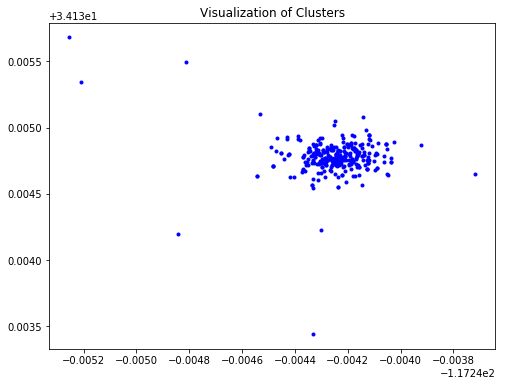

In [57]:
plt.figure(figsize = (8,6))
k = np.random.choice(unique_labels)
df2 = df1.loc[df1['labels'] == k]
plt.plot(df2['lng'], df2['lat'], 'o', color='b', markersize=3)
plt.title('Visualization of Clusters')
plt.show()

In [58]:
df2

,lng,lat,cluster_Mini,cluster_DB,labels,text,user_id
468,-117.244263,34.134867,68,1.0,68.01,who watched that showed Miami Monkey????? Is t...,who watched that showed Miami Monkey????? Is t...
1477,-117.244289,34.134814,68,1.0,68.01,@dprince1988 ooooohhh yea she did tho lol,@dprince1988 ooooohhh yea she did tho lol
11057,-117.244224,34.134722,68,1.0,68.01,now following @SoThatsDleqit,now following @SoThatsDleqit
11367,-117.244188,34.134722,68,1.0,68.01,home from work...guess i'll watch #TheChallenge,home from work...guess i'll watch #TheChallenge
12175,-117.244225,34.134766,68,1.0,68.01,Boooooooooooooty Call hours,Boooooooooooooty Call hours
19217,-117.244293,34.134827,68,1.0,68.01,can it be the weekend already....im ready to t...,can it be the weekend already....im ready to t...
19318,-117.244293,34.134827,68,1.0,68.01,All these fight parties this weekend....hmmmmm...,All these fight parties this weekend....hmmmmm...
19363,-117.244175,34.134844,68,1.0,68.01,"i hate when people be like""You better come to ...","i hate when people be like""You better come to ..."
19451,-117.244175,34.134935,68,1.0,68.01,before i even think goin put and turning up......,before i even think goin put and turning up......
20198,-117.244351,34.134758,68,1.0,68.01,whos watchin jerry springer,whos watchin jerry springer
